In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [17]:
x_axis = []
y_axis = []
inputs = []
outputs = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])

def click_event(event, x, y, flags, params):
    
    global x_axis 
    global y_axis
    global inputs
    
    if event == cv2.EVENT_LBUTTONDBLCLK:
        
        cv2.circle(img, (x,y), 5, (255, 0, 0), 2)

        x_axis.append(x)
        y_axis.append(y)
        z = (x,y)
        inputs.append(z)
        if len(y_axis) == 4:
            print('image coordinates: \n')
            for i in range(4):
                print(f"point {i+1}: ({x_axis[i]},{y_axis[i]})")
            
            inputs = np.float32(inputs)
            print('input points:', inputs)
            print('output points: ',outputs)

img = cv2.imread('images/jhonsmith.jpg')

cv2.namedWindow("Transformer")
cv2.setMouseCallback('Transformer', click_event)

while True:
    
    cv2.imshow('Transformer', img)
    
    key = cv2.waitKey(1)
        
    if len(inputs) == 4:
        
        # Get our Transform Matrix, M
        M = cv2.getPerspectiveTransform(inputs,outputs)
        # Apply the transform Matrix M using Warp Perspective
        dst = cv2.warpPerspective(img, M, (300,300))
        cv2.imshow('Transformed Image', dst)
        
    if key == ord("Q") or key == ord("q"):
        break
    
cv2.destroyAllWindows()

image coordinates: 

point 1: (132,221)
point 2: (218,565)
point 3: (692,89)
point 4: (834,362)
input points: [[132. 221.]
 [218. 565.]
 [692.  89.]
 [834. 362.]]
output points:  [[  0.   0.]
 [300.   0.]
 [  0. 300.]
 [300. 300.]]


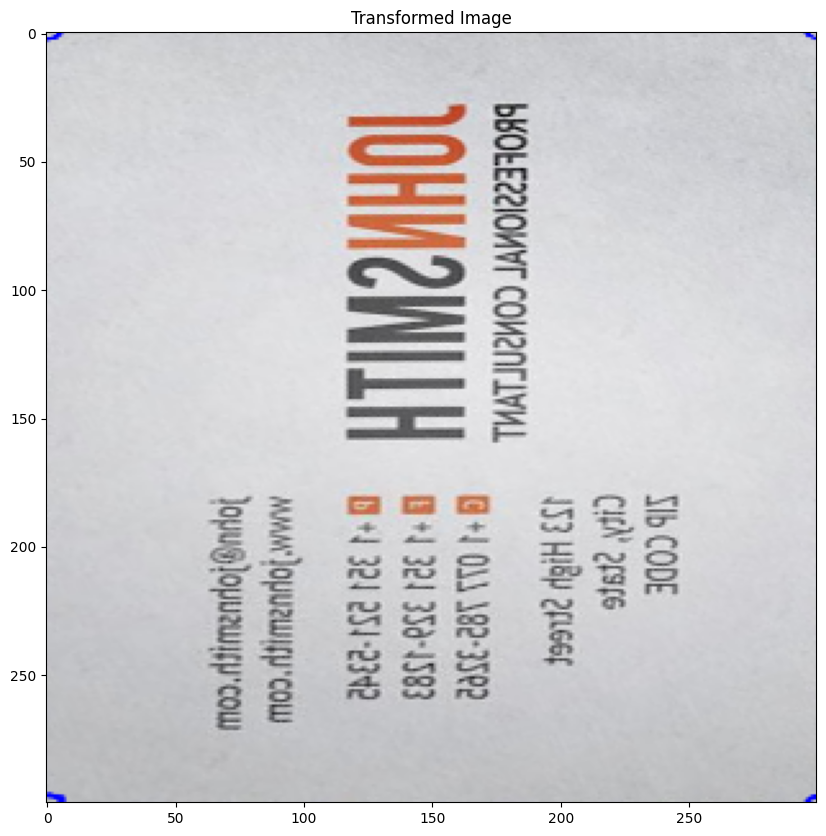

In [18]:
imshow('Transformed Image', dst)